<a href="https://colab.research.google.com/github/lumasg/La-esencia-del-cliente/blob/main/La_esencia_del_cliente_(Clasificacion)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***Esencia del Cliente (Clasificacion)***

Los directivos de la cadena de supermercados Universal Food hicieron un descubrimiento preocupante: hay miles de clientes que aún no son miembros de ninguna categoría, lo que impide brindarles una experiencia de compra excepcional. Por este motivo, tu misión como científico de datos es la de clasificar a estos clientes como miembros Bronce, Plata u Oro, para que puedan disfrutar de todas las ventajas que ofrece esta reconocida cadena de supermercados y mejorar así su experiencia de compra..

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv("/content/dataclientes")

In [ ]:
data = df[["genero", "estado_civil", "total_de_hijos", "escolaridad","miembro", "tipo", "ocupacion", "pais", "comercio"]]

In [ ]:
data.miembro.value_counts()

Bronce    13407
Normal     5581
Oro        2959
Plata      2154
Name: miembro, dtype: int64

In [ ]:
data = data[data['miembro'] != "Normal"]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46561 entries, 1 to 60427
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genero          46561 non-null  object 
 1   estado_civil    46561 non-null  object 
 2   total_de_hijos  46561 non-null  float64
 3   escolaridad     46561 non-null  object 
 4   miembro         46561 non-null  object 
 5   tipo            46561 non-null  object 
 6   ocupacion       46561 non-null  object 
 7   pais            46561 non-null  object 
 8   comercio        46561 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.6+ MB


In [ ]:
genero = {"Femenino" : 0, "Masculino" : 1}
edocivil = {"Soltero" : 0, "Casado" : 1}
escolaridad = {"Primaria" : 1, "Secundaria" : 2, "Técnico" : 3, "Superior" : 4, "Maestría" : 5 }
ocupacion = { 'Obrero' : 1 , 'Técnico' : 2 ,  'Profesional' : 3 ,'Gestión' : 2 , 'Cargo de Oficina' : 3}
miembro = {'Bronce' : 1, 'Plata': 2, 'Oro' : 3}


data.genero = data.genero.map(genero)
data["estado_civil"] = data["estado_civil"].map(edocivil)
data.escolaridad = data.escolaridad.map(escolaridad)
data.ocupacion = data.ocupacion.map(ocupacion)
data.miembro = data.miembro.map(miembro)

In [ ]:
data.sample(1)

,genero,estado_civil,total_de_hijos,escolaridad,miembro,tipo,ocupacion,pais,comercio
16376,1,1,3.0,4,1,Bebida,3,México,Supermercado de lujo


## 3. Exploración y selección de atributos

Correlación

In [ ]:
correlacion = data.corr()
correlacion

<ipython-input-8-2812bb356113>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = data.corr()


,genero,estado_civil,total_de_hijos,escolaridad,miembro,ocupacion
genero,1.000000,-0.025046,-0.024954,-0.014307,0.037591,-0.029664
estado_civil,-0.025046,1.000000,0.046714,0.003693,0.263120,0.020481
total_de_hijos,-0.024954,0.046714,1.000000,-0.065056,0.243584,-0.047944
escolaridad,-0.014307,0.003693,-0.065056,1.000000,-0.049957,0.513692
miembro,0.037591,0.263120,0.243584,-0.049957,1.000000,-0.004398
ocupacion,-0.029664,0.020481,-0.047944,0.513692,-0.004398,1.000000


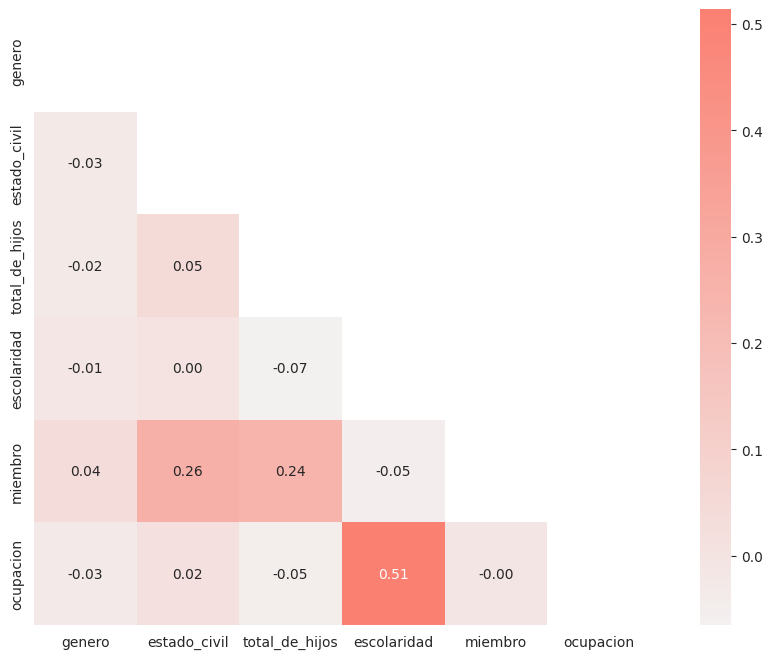

In [ ]:
#visualización de las correlaciones
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacion)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

x = data[["genero", "estado_civil", "total_de_hijos", "escolaridad", "ocupacion"]]
y = data["miembro"]

SEED = 158020
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, stratify = y)

print("Entrenaremos con %d elementos y evaluaremos con %d elementos" %(len(train_x), len(test_y)))

Entrenaremos con 12964 elementos y evaluaremos con 5556 elementos


##Modelo de arbol

In [ ]:
from sklearn.tree import DecisionTreeClassifier

SEED = 1420
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(train_x, train_y)

predicciones = modelo.predict(test_x)

accuracy = accuracy_score(test_y, predicciones) * 100
precision = precision_score(test_y, predicciones, average='weighted') * 100
recall = recall_score(test_y, predicciones, average='weighted') * 100

print("La exactitud(accuracy) fue %.2f%%" % accuracy)
print("La presicion(presicion) fue %.2f%%" % precision)
print("La sensitividad(recall) fue %.2f%%" % recall)

La exactitud(accuracy) fue 74.19%
La presicion(presicion) fue 70.19%
La sensitividad(recall) fue 74.19%


##Modelo SVC

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Estandarizar valores
scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# Crea el modelo de clasificación
modelSVC = SVC()

# Entrena el modelo con los datos de entrenamiento
modelSVC.fit(train_x, train_y)

# Realiza predicciones en el conjunto de prueba
predicciones = modelSVC.predict(test_x)

# Evalúa el modelo utilizando la exactitud, precisión y sensitividad
accuracy = accuracy_score(test_y, predicciones) * 100
precision = precision_score(test_y, predicciones, average='weighted') * 100
recall = recall_score(test_y, predicciones, average='weighted') * 100

print("La exactitud(accuracy) fue %.2f%%" % accuracy)
print("La presicion(presicion) fue %.2f%%" % precision)
print("La sensitividad(recall) fue %.2f%%" % recall)

La exactitud(accuracy) fue 74.32%
La presicion(presicion) fue 63.92%
La sensitividad(recall) fue 74.32%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Modelo Lineal

In [ ]:
from sklearn.svm import LinearSVC

# Crea el modelo de clasificación
modelLineal = LinearSVC()

# Entrena el modelo con los datos de entrenamiento
modelLineal.fit(train_x, train_y)

# Realiza predicciones en el conjunto de prueba
predicciones = modelLineal.predict(test_x)

# Evalúa el modelo utilizando la exactitud, precisión y sensitividad
accuracy = accuracy_score(test_y, predicciones) * 100
precision = precision_score(test_y, predicciones, average='weighted') * 100
recall = recall_score(test_y, predicciones, average='weighted') * 100

print("La exactitud(accuracy) fue %.2f%%" % accuracy)
print("La presicion(presicion) fue %.2f%%" % precision)
print("La sensitividad(recall) fue %.2f%%" % recall)


La exactitud(accuracy) fue 72.66%
La presicion(presicion) fue 61.78%
La sensitividad(recall) fue 72.66%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Grafico de arbol del modelo

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = data["miembro"]

X = data[["genero", "estado_civil", "total_de_hijos", "escolaridad", "ocupacion"]]

features = X.columns
dot_data = export_graphviz(modelo, feature_names = features)
grafico = graphviz.Source(dot_data)

grafico